# Projet Python pour la data science 2024 - 2025
*HADDOUCHE Théo, GOURVENNEC Jules, MATHÉ Cyprien, BROCHET Lison*

# Introduction
<div style="text-align: justify;">
<div style="text-align: justify; line-height: 1.8;">
Depuis les Jeux Olympiques de Paris 2024, un certain nombre de jeunes se sont pris de passion pour le tennis de table et la natation. Cependant, cet engouement s’est heurté au manque d’infrastructure, à leur vétusté et au manque d’encadrant. Cela a de nouveau mis en lumière le problème de l'accessibilité au sport et des « déserts sportifs ». A l’instar des « déserts médicaux », les « déserts sportifs » sont des zones géographiques souvent rurales, où les infrastructures sportives et les encadrants manquent et où infrastructures existantes sont pour la plupart vétustes et mal équipées. Cela constitue un obstacle à la pratique sportive des habitants de ces zones.

Pourtant, il semble exister un consensus sur les bienfaits d’une pratique sportive régulière, en cela qu’elle permet de prévenir un grand nombre de maladies notamment cardiovasculaires ; mais aussi en tant que facteur d’intégration sociale. Aussi, nous avons souhaité questionner cette notion de « désert sportif » sur la base du recensement des équipements sportifs en France. Pour cela, il nous a semblé pertinent d’analyser plusieurs variables telles que la vétusté des infrastructures étudiées, l’offre de sport selon les territoires et l’accessibilité aux infrastructures via des transports en commun.

Notre projet a donc pour objectif de répondre à la problématique suivante : A quel point la situation géographique d’un individu est-elle déterminante dans sa capacité à poursuivre une activité sportive régulière ?
</div>
</div>


# I/ Récupération et traitement des données

## A. Récupération des données : prise en main de l'API

<div style="text-align: justify;">
<div style="text-align: justify; line-height: 1.8;">
Nous utiliserons la base de données Data ES qui recense près de 330 000 infrastructures sportives en France. Ces données sont mises à disposition par le ministère chargé des sports afin "d’aider à une meilleure perception des inégali­tés ter­ri­to­ria­les dans leur répar­ti­tion", perspective dans laquelle s'inscrit notre travail.

Les données que nous allons utiliser sont accessibles par une API qui nous permet de n'accéder qu'à quelques valeurs choisies en évitant de tout télécharger chaque fois. Deux modes d'accès sont permis, l'un limite à 100 éléments livrant directement un dataframe, un autre sans limite donne le lien de téléchargement d'un .csv. Le lien se construit dans l'interface du site avec une syntaxe proche du SQL accessible ici : https://equipements.sports.gouv.fr/explore/dataset/data-es/api/?q.

Les fonctions qui permettent d'obtenir les dataframes par ces deux méthodes sont importées et visibles depuis fonctions.py.
</div>
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fonctions import *

#Un exemple de lien pour obtenir le nombre d'infrastructures par département à l'aide de la méthode group_by et renommé sous la varibale nb_infra
api_url = "https://equipements.sports.gouv.fr/api/explore/v2.1/catalog/datasets/data-es/records?select=COUNT(inst_numero)%20as%20nb_infra&group_by=dep_nom&order_by=dep_code&limit=-1"
tab = call_api(api_url)
tab.head(3)

dict_keys(['results'])


,dep_nom,nb_infra
0,None,3
1,Ain,4118
2,Aisne,3691


<div style="text-align: justify;">
<div style="text-align: justify; line-height: 1.8;">
Pour travailler sur des données nettoyées et éviter de refaire le travail de nettoyage à chaque appel, il nous faut garder en mémoire notre traitement. Cependant, pour ne pas avoir un appel trop lourd, nous nous limiterons à n'appeler qu'une partie des 117 caractéristiques d'équipements sportifs disponibles.
</div>
</div>

<div style="text-align: justify;">
<div style="text-align: justify; line-height: 1.8;">
Nous allons donc procéder au traitement sur le jeu réduit de paramètres (31/117 disponibles):

inst_numero, inst_nom, dep_nom, dep_code_filled, new_code, new_name, inst_etat, 
inst_date_creation, inst_date_etat, inst_date_valid, inst_acc_handi_bool, 
inst_trans_bool, equip_numero, equip_nom, equip_type_code, 
equip_type_name, equip_type_famille, equip_x, equip_y, 
equip_etat, equip_eclair, equip_douche, equip_sanit, 
equip_pmr_aire, equip_pmr_douche, equip_pmr_sanit, 
equip_travaux_date, equip_service_date, equip_travaux_type, 
equip_energie, equip_prop_type, dens_lib, zrr_simp
</div>
</div>


In [2]:
#Cette cellule prend environ 1m30 à être exécutée, elle appelle tous les équipements sur les 31 caractéristiques précedemment identifiées.
url = "https://equipements.sports.gouv.fr/api/explore/v2.1/catalog/datasets/data-es/records?select=inst_numero%2C%20inst_nom%2C%20dep_nom%2C%20dep_code_filled%2C%20new_code%2C%20new_name%2C%20inst_etat%2C%20%20inst_date_creation%2C%20inst_date_etat%2C%20inst_date_valid%2C%20inst_acc_handi_bool%2C%20%20inst_trans_bool%2C%20equip_numero%2C%20equip_nom%2C%20equip_type_code%2C%20%20equip_type_name%2C%20equip_type_famille%2C%20equip_x%2C%20equip_y%2C%20%20equip_etat%2C%20equip_eclair%2C%20equip_douche%2C%20equip_sanit%2C%20%20equip_pmr_aire%2C%20equip_pmr_douche%2C%20equip_pmr_sanit%2C%20%20equip_travaux_date%2C%20equip_service_date%2C%20equip_service_periode%2C%20equip_travaux_type%2C%20%20equip_energie%2C%20equip_prop_type%2C%20dens_lib%2C%20zrr_simp&limit=-1"

recensement = call_csv(url)
recensement.head(3)

c:\Users\cypri\Downloads\fonctions.py:32: DtypeWarning: Columns (3,4,26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('equipements_ile_de_france.csv', delimiter=';')


,inst_numero,inst_nom,dep_nom,dep_code_filled,new_code,new_name,inst_etat,inst_date_creation,inst_date_etat,inst_date_valid,...,equip_pmr_douche,equip_pmr_sanit,equip_travaux_date,equip_service_date,equip_service_periode,equip_travaux_type,equip_energie,equip_prop_type,dens_lib,zrr_simp
0,I130720001,BASE DE LOISIRS DE LA GARENNE,Bouches-du-Rhône,13,13072,Peynier,Attribué,2005-08-28,2020-05-27,2015-09-28,...,False,False,2010.0,NaN,1985-1994,"[""Mise en conformité avec les normes AFNOR ou ...",NaN,Commune,Bourgs ruraux,NC - Commune non classée
1,I130720003,PLATEAU MULTISPORTS,Bouches-du-Rhône,13,13072,Peynier,Attribué,2005-11-17,2020-05-27,2015-07-03,...,NaN,False,NaN,NaN,1995-2004,NaN,NaN,Commune,Bourgs ruraux,NC - Commune non classée
2,I130720004,JEU DE BOULES,Bouches-du-Rhône,13,13072,Peynier,Attribué,2005-11-17,2020-05-27,2015-07-03,...,NaN,False,2012.0,NaN,1965-1974,"[""Inadaptation aux attentes des usagers"", ""Vét...",NaN,Commune,Bourgs ruraux,NC - Commune non classée


### Ajout d'une petit base de données économiques

<div style="text-align: justify;">
<div style="text-align: justify; line-height: 1.8;">
Pour étudier les inégalités entre territoires, il nous semblait intéressant de comparer la base Data ES avec des indicateurs de richesse des territoires. Nous importons en conséquence un fichier .csv mis à disposition par l'INSEE sur https://statistiques-locales.insee.fr/#c=indicator&i=filosofi.rd&s=2021&view=map2 . Ce petit tableau contient le rapport interdécile du niveau de vie, la part des ménages fiscaux imposés et la médiane du niveau de vie par département (données de 2021).
</div>
</div>

In [3]:
#Importation de données économiques depuis : https://statistiques-locales.insee.fr/#c=indicator&i=filosofi.rd&s=2021&view=map2 (INSEE)

data_eco = pd.read_csv('data_eco.csv', delimiter=';', skiprows= 2)
data_eco.head(4)



,Code,Libellé,Rapport interdécile du niveau de vie (9e déc./1er déc.) 2021,Part des ménages fiscaux imposés 2021,Médiane du niveau de vie 2021
0,01,Ain,3.5,55.2,24810
1,02,Aisne,3.1,45.2,20920
2,03,Allier,3,45.3,21500
3,04,Alpes-de-Haute-Provence,3.2,47.3,21790


In [4]:
import geopandas as gpd
from cartiflette import carti_download

departements = carti_download(
    values="France",
    crs=4326,
    borders="DEPARTEMENT",
    vectorfile_format="geojson",
    filter_by="FRANCE_ENTIERE_DROM_RAPPROCHES",
    source="EXPRESS-COG-CARTO-TERRITOIRE",
    year=2022,
)

#Passage en espg 2154 : Lambert 93 pour avoir des surfaces en m²
departements = departements.to_crs(epsg=2154)

# Ajout de l'aire en km²
departements['AREA'] = departements.area.div(1e6)

## B. Nettoyage des données

<div style="text-align: justify;">
<div style="text-align: justify; line-height: 1.8;">
Les données disponibles étaient dans l'ensemble plutôt "propres" même si l'on a pu remarquer qu'un grand nombre de caractéristiques n'avaient pas été chaque fois remplies par les usagers, ce qu'il nous faudra prendre en compte au besoin. Il existe tout de même un problème de doublon que nous allons traiter. 
</div>
</div>

<div style="text-align: justify;">
<div style="text-align: justify; line-height: 1.8;">
Il existe dans le jeu de données des sites comptés plusieurs fois pour leurs différentes infrastructures (plusieurs bâtiments ou piscines par exemple). Nous souhaitons supprimer ces doublons. Nous pourrions les supprimer par nom de site redondant, mais pour éviter les possibles de conflits de nom sur toute la France, nous préférons ajouter le code de commune à la distinction. Le couple (nom d'infrastructure, code de commune) devrait agir comme clef primaire.
</div>
</div>

In [5]:
# Création d'une liste qui compte le nombre de doublons par couple (nom d'infrastructure, code de commune) censé représenter une infrastructure unique
doublons = (recensement
            .groupby(['inst_nom', 'new_code'])
            .size()
            .reset_index(name='n')
            .query('n > 0'))

#Suppression des précédents doublons en les remplaçant tous par la première occurence du couple dans le dataset
distinct = recensement.drop_duplicates(subset=['inst_nom', 'new_code'], keep='first')
print("Doublons supprimés : ", len(recensement)-len(distinct))
print("Fréquence de lignes supprimées :", (len(recensement)-len(distinct))/len(recensement))

#Ajout du nombre d'occurence correspondant à chaque couple (nombre de doublons supprimés par infrastructure dans la liste)
df_es = pd.merge(distinct, doublons, on=['inst_nom', 'new_code'], how='outer')

Doublons supprimés :  169989
Fréquence de lignes supprimées : 0.5108379787537752


<div style="text-align: justify;">
Près de 50% des lignes du datasets ont été supprimées, le nettoyage était donc bien nécessaire.

<div style="text-align: justify;">
<div style="text-align: justify; line-height: 1.8;">
On remarque aussi une irrégularité dans le format des codes de département qui nous portera préjudice ensuite. Nous la corrigeons maintenant.
</div>
</div>

In [6]:
#Passage en format standard code INSEE
k = 0
def clean(dep_code):
    global k
    if dep_code == '2A' or dep_code == '2B': #exception pour la Corse NaN
        return dep_code
    if pd.isna(dep_code):  # Gérer les valeurs manquantes
        k+=1
        return None
    return f"{int(float(dep_code)):02d}"

#Application de la fonction précédente
df_es['dep_code_filled'] = df_es['dep_code_filled'].apply(clean)

print('Nombre de sites sans code :', k)

Nombre de sites sans code : 3


Nettoyage de la colonne de période de mise en service : uniformisation du format

In [7]:
# Transformation de '19XX-19YY' en '19XX - 19YY'
df_es['equip_service_periode'] = df_es['equip_service_periode'].str.replace('  -  ', ' - ', regex=True)

Il n'y a que 3 sites sans code départemental donc un nettoyage n'est pas nécessaire pour les traiter.

#### Préparation des donnéees de cartiflette et synthèse avec les données éco.
<div style="text-align: justify;">
<div style="text-align: justify; line-height: 1.8;">
 Nous devons supprimer quelques départements pour cette catégorie de données pour indisponibilité de certaines de leurs valeurs (notamment territoires ultramarins). 
 </div>
 </div>

In [8]:
#Correction des polygones cartiflette pour n'avoir qu'un polygone par département
departements = departements.dissolve(by='INSEE_DEP')
departements = departements.reset_index()

departements['INSEE_DEP'] = departements['INSEE_DEP'].astype(str)

In [9]:
import copy

#Faire une copie pour ne pas enlever les départements dans le dataset initial
departements_eco = copy.deepcopy(departements)

#To merge cartiflette data and the database imported
departements_eco = departements_eco.merge(data_eco, left_on="INSEE_DEP", right_on="Code", how="left")

#Nettoyage de données : retirer les départements dont les données ne sont pas disponibles
departements_eco['Médiane du niveau de vie 2021'] = departements_eco['Médiane du niveau de vie 2021'].replace('N/A - résultat non disponible',np.nan).astype(float)
departements_eco= departements_eco.dropna(subset=['Médiane du niveau de vie 2021'])

#Conversion en format numérique
departements_eco['Rapport interdécile du niveau de vie (9e déc./1er déc.) 2021'] = departements_eco['Rapport interdécile du niveau de vie (9e déc./1er déc.) 2021'].astype(float)
departements_eco.head(2)

,INSEE_DEP,geometry,PAYS,LIBELLE_DEPARTEMENT,POPULATION,SOURCE,AREA,Code,Libellé,Rapport interdécile du niveau de vie (9e déc./1er déc.) 2021,Part des ménages fiscaux imposés 2021,Médiane du niveau de vie 2021
0,01,"POLYGON ((877348.5 6596702.5, 877276.3 6596665...",France,Ain,652432,IGN:EXPRESS-COG-CARTO-TERRITOIRE,5774.271728,01,Ain,3.5,55.2,24810.0
1,02,"POLYGON ((776099.6 6923411.2, 776238.3 6924150...",France,Aisne,531345,IGN:EXPRESS-COG-CARTO-TERRITOIRE,7418.609601,02,Aisne,3.1,45.2,20920.0


## C. Création de nouvelles variables 

# II/ Analyse descriptive et représentation graphique

## A. Description de la base de données utilisée

<div style="text-align: justify;">
<div style="text-align: justify; line-height: 1.8;">
La base de données nous offre des indicateurs sur les dates de mise en service des installations. Les dates précises sont peu remplies mais la période de mise en service est disponible pour près de 90 % des installations.
</div>
</div>

In [10]:
df_es.columns

Index(['inst_numero', 'inst_nom', 'dep_nom', 'dep_code_filled', 'new_code',
       'new_name', 'inst_etat', 'inst_date_creation', 'inst_date_etat',
       'inst_date_valid', 'inst_acc_handi_bool', 'inst_trans_bool',
       'equip_numero', 'equip_nom', 'equip_type_code', 'equip_type_name',
       'equip_type_famille', 'equip_x', 'equip_y', 'equip_etat',
       'equip_eclair', 'equip_douche', 'equip_sanit', 'equip_pmr_aire',
       'equip_pmr_douche', 'equip_pmr_sanit', 'equip_travaux_date',
       'equip_service_date', 'equip_service_periode', 'equip_travaux_type',
       'equip_energie', 'equip_prop_type', 'dens_lib', 'zrr_simp', 'n'],
      dtype='object')

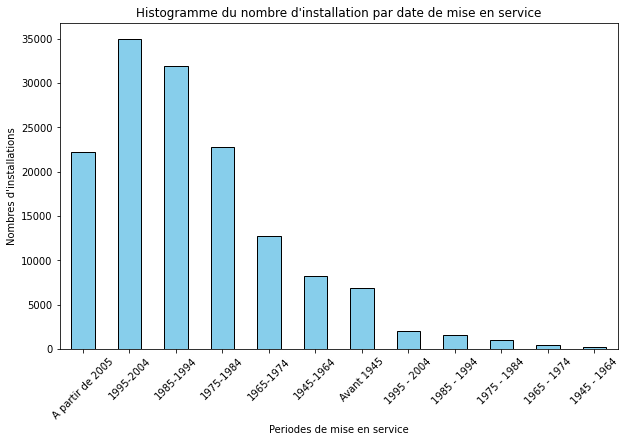

Part de données libellées : 0.8918390917579987


In [11]:
#Compter les occurences de chaque période de mise en service
period_counts = df_es['equip_service_periode'].value_counts()

# Mise de la période 2005 en avant du graphique
sorted_index = ['A partir de 2005'] + [p for p in period_counts.index if p != 'A partir de 2005']
period_counts = period_counts.reindex(sorted_index)

# Plot histogram
plt.figure(figsize=(10, 6))
period_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Histogramme du nombre d\'installation par date de mise en service')
plt.xlabel('Periodes de mise en service')
plt.ylabel('Nombres d\'installations')
plt.xticks(rotation=45)
plt.show()

print('Part de données libellées :', period_counts.sum()/len(df_es))

<div style="text-align: justify;">
<div style="text-align: justify; line-height: 1.8;">
Pour représenter nos données sur une carte et donner des tendances par territoire, nous commençons par mettre en place le module cartiflette qui va nous permettre d'obtenir des données géographiques pour tracer des valeurs par département. Le code suivant s'emploie à créer un dataframe adapté à cartiflette à partir de notre dataset.
</div>
</div>

In [12]:
#Pour accorder les deux colonnes sur lesquelles merge les bases de donnée, la synthèse se fait sur 'dep_code_filled'
# Le filled est très important pour une question de correspondance de syntaxe

#On compte le nombre de numéro de sites différents par code de département
counts = df_es.groupby('dep_code_filled')['inst_numero'].count().reset_index(name='count')

#On passe le code de département en string pour cartiflette
counts['dep_code_filled'] = counts['dep_code_filled'].astype(str)

#Fusion des données cartiflette et de notre base de données par le numéro des départements maintenant homogénéisé
departements = departements.merge(counts, left_on="INSEE_DEP", right_on="dep_code_filled", how="left")
departements_eco = departements_eco.merge(counts, left_on="INSEE_DEP", right_on="dep_code_filled", how="left")

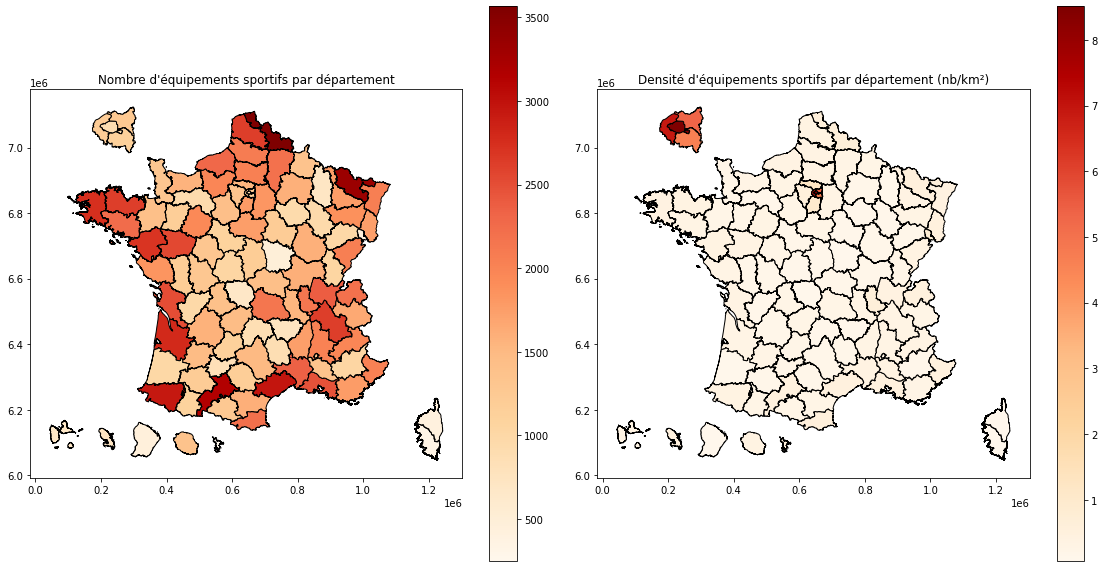

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Tracer une première carte de nb d'infra par dep
departements.plot(
    column='count',            # La colonne utilisée pour colorier la carte
    cmap='OrRd',                  # Palette de couleurs (Orange-Red)
    legend=True,                  # Afficher une légende
    ax=axes[0],              # Taille de la carte
    edgecolor='black'             # Couleur des bordures
)

axes[0].set_title('Nombre d\'équipements sportifs par département')

# Tracer une seconde carte pour obtenir un indicateur secondaire calculé à partir des autres données (ici nb d'infra par km²)
departements['param_interet'] = departements['count']/departements['AREA']

departements.plot(
    column='param_interet',            # La colonne utilisée pour colorier la carte
    cmap='OrRd',                  # Palette de couleurs (Orange-Red)
    legend=True,                  # Afficher une légende
    ax=axes[1],              # Taille de la carte
    edgecolor='black'             # Couleur des bordures
)

axes[1].set_title("Densité d'équipements sportifs par département (nb/km²)")

plt.tight_layout()


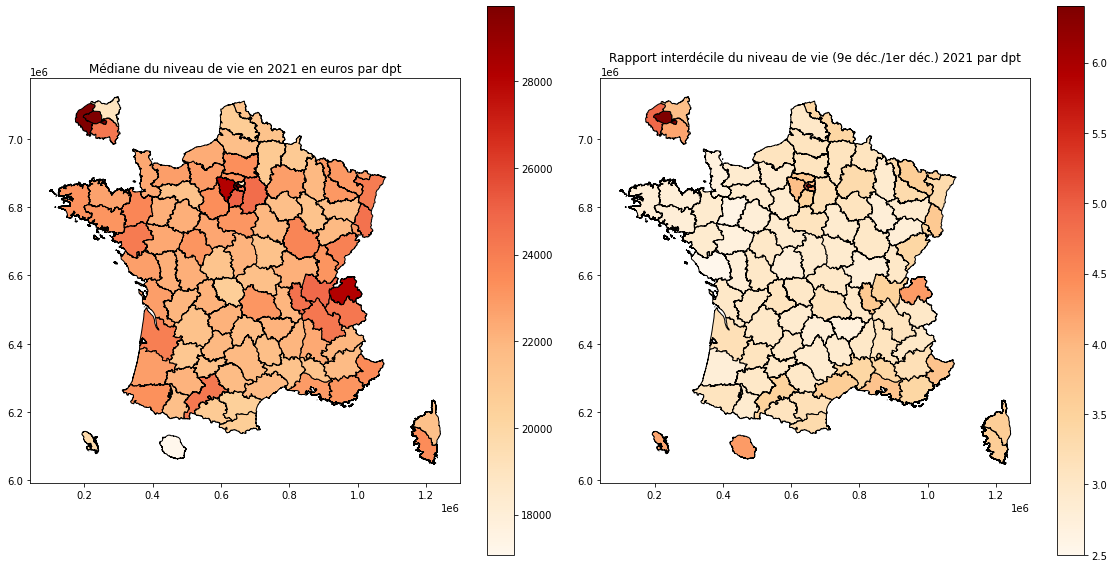

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

departements_eco.plot(
    column='Médiane du niveau de vie 2021',            # La colonne utilisée pour colorier la carte
    cmap='OrRd',                  # Palette de couleurs (Orange-Red)
    legend=True,                  # Afficher une légende
    ax=axes[0],              # Taille de la carte
    edgecolor='black'             # Couleur des bordures
)

axes[0].set_title('Médiane du niveau de vie en 2021 en euros par dpt')

#Rapport interdécile du niveau de vie (sorte de niveau d'inégalité)

departements_eco.plot(
    column='Rapport interdécile du niveau de vie (9e déc./1er déc.) 2021',            # La colonne utilisée pour colorier la carte
    cmap='OrRd',                  # Palette de couleurs (Orange-Red)
    legend=True,                  # Afficher une légende
    ax=axes[1],              # Taille de la carte
    edgecolor='black'             # Couleur des bordures
)

axes[1].set_title("Rapport interdécile du niveau de vie (9e déc./1er déc.) 2021 par dpt")

plt.tight_layout()

## B. Grandes tendances observées

# III/ Modélisation

On propose, pour identifier quelques liens possibles derrière ces inégalités, de faire une régression linéaire multivariée à partir des paramètres que nous avons précédemment utilisé.

La fonction regression est accessible dans fonctions.py

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#Copie du dataset par précaution
df_reg = copy.deepcopy(departements_eco)

# Sélectionner les colonnes pour la régression
X = df_reg[['POPULATION', 'Médiane du niveau de vie 2021','Rapport interdécile du niveau de vie (9e déc./1er déc.) 2021','AREA']]  # Variables indépendantes
y = df_reg['count']            # Variable dépendante

results = regression(X,y)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.567
Model:                            OLS   Adj. R-squared:                  0.548
Method:                 Least Squares   F-statistic:                     45.67
Date:                Sat, 28 Dec 2024   Prob (F-statistic):           3.62e-21
Time:                        22:15:33   Log-Likelihood:                -737.23
No. Observations:                  98   AIC:                             1484.
Df Residuals:                      93   BIC:                             1497.
Df Model:                           4                                         
Covariance Type:                  HC0                                         
================================================================================================================================
                                                                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------
const                                                          924.3048    936.307      0.987      0.324    -910.824    2759.433
POPULATION                                                       0.0010   9.52e-05     10.762      0.000       0.001       0.001
Médiane du niveau de vie 2021                                   -0.0111      0.028     -0.401      0.688      -0.065       0.043
Rapport interdécile du niveau de vie (9e déc./1er déc.) 2021  -173.2891    166.780     -1.039      0.299    -500.172     153.594
AREA                                                             0.1455      0.031      4.754      0.000       0.085       0.205
==============================================================================
Omnibus:                        4.381   Durbin-Watson:                   2.118
Prob(Omnibus):                  0.112   Jarque-Bera (JB):                4.088
Skew:                           0.500   Prob(JB):                        0.130
Kurtosis:                       3.028   Cond. No.                     1.39e+07
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
[2] The condition number is large, 1.39e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Vue globale des inégalités à l'aide d'un indice de Gini

Dans cette dernière partie, nous formulons une première méthode pour prévoir les besoins en équipements sportifs à prévoir pour compenser les inégalités entre territoires.

Nous considérons par exemple que des territoires dotés également en infrastructures auraient un nombre d'infrastructure prévu seulement en fonction du nombre d'habitants et de la superficie (contrainte spatiale) d'un département par exemple.

Pour "mesurer" le niveau d'inégalité, entre départements par exemple, on peut calculer le coefficient de Gini pour la richesse en installations (nombre) contrôlée par des caractéristiques du département comme sa population.
Un calcul par région ne serait pas pertinent au vu du faible échantillon dans chacun d'entre eux, mais un coefficient national avec près de 100 départements l'est déjà beaucoup plus.

In [16]:
def gini(df, X_col, Y_col):

    populations = df[X_col].values
    installations = df[Y_col].values 
    
    # Trier les départements par leur ratio nb_install / X (contrôle)
    sorted_indices = np.argsort(installations / populations)
    sorted_populations = populations[sorted_indices]
    sorted_installations = installations[sorted_indices]
    
    # Compute cumulative sums
    cumulative_populations = np.cumsum(sorted_populations)
    cumulative_installations = np.cumsum(sorted_installations)
    total_population = np.sum(populations)
    total_installations = np.sum(installations)
    
    normalized_populations = cumulative_populations / total_population
    normalized_installations = cumulative_installations / total_installations
    
    # Calcul du coefficient par méthode graphique
    lorenz_x = np.insert(normalized_populations, 0, 0)
    lorenz_y = np.insert(normalized_installations, 0, 0)
    area_under_curve = np.trapezoid(lorenz_y, lorenz_x)
    gini = 1 - 2 * area_under_curve
    
    return gini

print('Indice de Gini du nombre d\'infrastructures par département par population :',gini(df_reg,'POPULATION','count'))
print('Indice de Gini du nombre d\'infrastructures par département par niveau de vie:',gini(df_reg,'Médiane du niveau de vie 2021','count'))

Indice de Gini du nombre d'infrastructures par département par population : 0.3053329209057548
Indice de Gini du nombre d'infrastructures par département par niveau de vie: 0.22940657548494348


Il est difficile d'interpréter ces coefficients sans comparaison intertemporelle. On observe tout de même que les coefficients observés témoignent d'une inégalité mesurée avec moins des coefficients sous la barre de 1/3. Le coefficient de Gini contrôlé par un indicateur de revenu est plus faible que celui calculé à partir des parts de population ce qui fait transparaitre une concentration plus importante des infrastructures dans les mains des plus aisés.

### Estimation des efforts à fournir pour égaliser les terrritoires

N'ayant pas accès aux montants des investissements déployés, nous proposons de nous intéresser à la place au nombre d'installations des territoires. Il devrait dépendre principalement de la population dans une situation égalitaire, mais pour prendre en compte la difficulté à les construire (et donc leur coût potentiel) par manque d'espace par exemple, nous prendrons aussi en compte la superficie disponible des départements.

Cette démarche est largement imparfaite, ne prenant pas en compte les dimensions de chaque installation ou leur type, mais elle se veut présenter des premiers ordres de grandeur d'effort.

In [19]:
df_reg['densite'] = df_reg['POPULATION']/df_reg['AREA']
X = df_reg[['POPULATION','densite']]  # Variables indépendantes
y = df_reg['count']            # Variable dépendante
dep_idx = df_reg['LIBELLE_DEPARTEMENT']

tempdf = prediction(X,y, afficher = False)

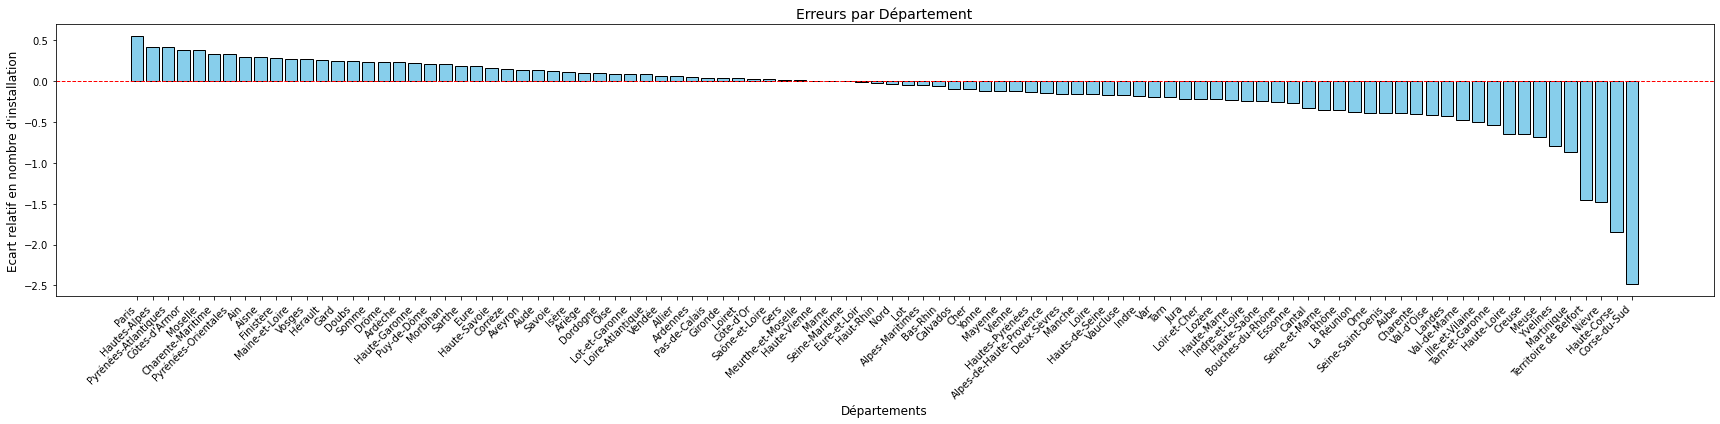

In [24]:
# Trier les départements par ordre d'erreur (optionnel)
tempdf['dep_nom'] = dep_idx
tempdf['wealth'] = df_reg['Médiane du niveau de vie 2021']
tempdf['ratio'] = tempdf['error']/df_reg['count']
tempdf = tempdf.sort_values(by='ratio', ascending=False)

# Créer le bar plot
plt.figure(figsize=(24, 6))  # Ajuster la taille de la figure
plt.bar(tempdf['dep_nom'], tempdf['ratio'], color='skyblue', edgecolor='black')

# Ajouter des titres et des labels
plt.title('Erreurs par Département', fontsize=14)
plt.xlabel('Départements', fontsize=12)
plt.ylabel('Ecart relatif en nombre d\'installation', fontsize=12)
plt.axhline(0, color='red', linestyle='--', linewidth=1)  # Ligne horizontale pour zéro

# Ajuster la rotation et l'alignement des noms de départements
plt.xticks(rotation=45, ha='right', fontsize=10)

plt.tight_layout()  # Ajuste la disposition pour éviter les chevauchements
plt.show()

Ce dernier graphique veut pouvoir comparer ce qui sépare chaque département de la situation nationale. Y est représenté la différence entre le nombre d'installations effectifs, et celui prédit par la régression sur les variables (population, densité), divisé par le nombre d'installations de chaque commune.

On y observe que les départments les plus en retard le serait de près 50 % de leur nombre total d'installation (atteignant même plus de 100 % pour les départements le splus désavantagés). Paris figure "avantagé" par rapport à la moyenne nationale, une conséquence de considérer l'investissement nécessaire dans une région à forte pression foncière.  

En réarrangeant ces départements par niveau de vie économique (possible en changeant le ascending order par 'wealth' dans la cellule ci-dessus), on ne voit pas de tendance claire associée à la distribution des inégalités, ce qui invite à une analyse plus fine pour établir le lien.